# Look at the dataset

In [1]:
!head -n5 data/assign_wk1/movies.dat

1;Toy Story (1995);Animation|Children's|Comedy
2;Jumanji (1995);Adventure|Children's|Fantasy
3;Grumpier Old Men (1995);Comedy|Romance
4;Waiting to Exhale (1995);Comedy|Drama
5;Father of the Bride Part II (1995);Comedy


In [2]:
!head -n5 data/assign_wk1/ratings.dat

1;1193;5;978300760
1;661;3;978302109
1;914;3;978301968
1;3408;4;978300275
1;2355;5;978824291


In [3]:
!head -n5 data/assign_wk1/users.dat

1;F;1;10;48067
2;M;56;16;70072
3;M;25;15;55117
4;M;45;7;02460
5;M;25;20;55455


# Data preparation in Pandas

In [4]:
import pandas as pd

In [5]:
movies_df = pd.read_csv('data/assign_wk1/movies.dat', sep=';', encoding="ISO-8859-1", names=['MovieID', 'Title', 'Genres'])
movies_df.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [6]:
ratings_df = pd.read_csv('data/assign_wk1/ratings.dat', sep=';', encoding='ISO-8859-1', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
ratings_df.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [7]:
users_df = pd.read_csv('data/assign_wk1/users.dat', sep=';', encoding='ISO-8859-1', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
users_df.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [8]:
# The following line behaves properly by merging on columns that are the intersection of each
# dataframe:
# lens_df = pd.merge(pd.merge(movies_df, ratings_df), users_df)

# But, the below merge is more explicit and easier for me to understand:
lens_df = movies_df.merge(ratings_df, on = 'MovieID').merge(users_df, on='UserID')
lens_df.head(20)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


# Assignment

## 1. Info and shape

#### 1.1 Info

##### 1.1.A Describe what the `info` function is used for?
  According to Pandas API Reference (n.d. a) the **`info`** function prints a concise summary of a DataFrame.

##### 1.1.B What information is returned from this function?
  Each column is summarized by its title, number of non-null values, and its data type

##### 1.1.C Why is this information helpful?
  This information can be used to ...
  1. Verify that the data type of each column was interpreted correctly.  E.g. we could decide that we need to convert the *Title* column from `object` to `string` or we could convert the *Timestamp* column from `int64` to `datetime`
  2. Quickly examine whether a column is sparsely populated with "useful" values.  As mentioned in the reading, we may choose to drop columns which don't contain enough information to be useful for our purposes.

In [9]:
lens_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


#### 1.2 Shape

##### 1.2.A Describe what the `shape` property is used for?
  According to Pandas API Reference (n.d. b) the **`shape`** property returns a tuple (immutable list) describing the dimensions of the Data Frame.

##### 1.2.B What information is returned from this property?
  The tuple contains the number of rows (observations, data points) and the number of columns (variables, features) in the Data Frame.

##### 1.2.C Why is this information helpful?
  As imports, transformations, merges, and drops are performed, the **`shape`** property can be examined to verify the data contains the expected values.  For example, the README states that *These files contain 1,000,209 anonymous ratings*, which matches the number of rows of our Data Frame, thus lending confidence that the **`read_csv`** returned the proper number of rows and the **`merge`** methods executed as expected.


In [10]:
lens_df.shape

(1000209, 10)

## 2. Questions

#### 2.1 Which movie has the highest average rating?

##### 2.1.A First iteration

This code works, in that it returns highly rated movies (several are "tied" for highest average rating of 5.0)

However, these movies had very few ratings (the "top" 10 movies using this method had at most 3 ratings)

In [11]:
lens_df.groupby(['MovieID']).agg(MeanRating=('Rating', 'mean'),
                                 RatingCount=('Rating', 'count'),
                                 Title=('Title', lambda s: s.iloc[0])).sort_values('MeanRating',
                                                                                   ascending=False).head(1)

,MeanRating,RatingCount,Title
MovieID,,,
989,5.0,1,Schlafes Bruder (Brother of Sleep) (1995)


##### 2.1.B Second iteration

This code filters out movies with fewer than 100 ratings.

It could be argued that this approach favors popular movies, but a) it was fun to experiment with Pandas and b) it actually eliminated relatively few movies and prevents the data from being skewed by movies which are highly rated by less than a handful or users.

In [12]:
min_ratings_df = lens_df.groupby('MovieID').filter(lambda col: len(col) >= 100)
min_ratings_with_headings_df = min_ratings_df.groupby(['MovieID']).agg(MeanRating=('Rating', 'mean'),
                                                                       RatingCount=('Rating', 'count'),
                                                                       Title=('Title', lambda s: s.iloc[0]))
min_ratings_with_headings_df = min_ratings_with_headings_df.rename(columns={('Rating', 'mean'): 'Mean Rating'})
min_ratings_with_headings_df.sort_values('MeanRating', ascending=False).head(1)

,MeanRating,RatingCount,Title
MovieID,,,
2019,4.56051,628,Seven Samurai (The Magnificent Seven) (Shichin...


#### 2.2 Which movie has the lowest average rating?

##### 2.2.A First iteration

Similar to the reasoning above, we first look at `MeanRating` from the full data set, but the results are skewed by movies with extremely low ratings by a relatively small number of reviewers.

In [13]:
lens_df.groupby(['MovieID']).agg(MeanRating=('Rating', 'mean'),
                                 RatingCount=('Rating', 'count'),
                                 Title=('Title', lambda s: s.iloc[0])).sort_values('MeanRating',
                                                                                   ascending=True).head(1)


,MeanRating,RatingCount,Title
MovieID,,,
1430,1.0,1,Underworld (1997)


##### 2.2.B Second iteration

Again, we utilize the data set which is filtered for movies with at least 100 reviews and we get a different answer.

In [14]:
min_ratings_with_headings_df.sort_values('MeanRating', ascending=True).head(1)

,MeanRating,RatingCount,Title
MovieID,,,
810,1.466667,120,Kazaam (1996)


#### 2.3 Which movie has the most ratings in our dataset?

In [15]:
min_ratings_with_headings_df.sort_values('RatingCount', ascending=False).head(1)

,MeanRating,RatingCount,Title
MovieID,,,
2858,4.317386,3428,American Beauty (1999)


#### 2.4 List the 10 users who have rated the most movies?

In [16]:
lens_df.groupby('UserID').agg(UserIdCount=('UserID', 'count')).sort_values('UserIdCount',
                                                                           ascending=False).head(10)

,UserIdCount
UserID,
4169,2314
1680,1850
4277,1743
1941,1595
1181,1521
889,1518
3618,1344
2063,1323
1150,1302


## 3. Investigative questions

* Data Visualization: histograms, boxplots
* Descriptive functions: info(), describe(), shape
* Dataframe reshaping: removal of rows or columns
* Functions: 
     * apply()
     * lambda()
     * aggregration (.agg)
     * groupby()
* Conditional formatting in a dataframe

## 3.1 Boxplot of ratings counts

This investigation uses **`groupby`**, **`agg`**, **`lambda`**, **`describe`**, transpose (**`T`**), and **`boxplot`** to display the distribution of the number of ratings a movie has.

I found this interesting because in **2.1.B** I deliberately excluded movies with fewer than 100 ratings.  This made me wonder if I made the right decision.  Looking at the result of **`describe`** and **`boxplot`** shows that there could be other strategies for selecting the highest-rated movies.  For example, one could exclude outliers (if concerned about "ballot-box stuffing") or one could look at only movies that fall within the Inner Quartile Range (IQR).

In [17]:
# For this analysis, we go back to the original DataFrame (lens_df) in order to
# examine the full RatingCount distribution (vice the DataFrame filtered to)
# only include movies with 100 or more ratings
all_ratings_with_headings_df = lens_df.groupby(['MovieID']).agg(MeanRating=('Rating', 'mean'),
                                                                RatingCount=('Rating', 'count'),
                                                                Title=('Title', lambda s: s.iloc[0]))

all_ratings_with_headings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MeanRating,3706.0,3.238892,0.672925,1.0,2.822705,3.331546,3.740741,5.0
RatingCount,3706.0,269.889099,384.047838,1.0,33.000000,123.500000,350.000000,3428.0


<AxesSubplot:>

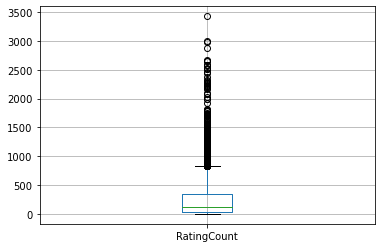

In [18]:
all_ratings_with_headings_df.boxplot('RatingCount')

## 3.2 Manual 'one-hot' encoding of user gender

This investigation uses **`apply`**, **`lambda`**, **`drop`**, **`info`**, and **`shape`** to perform *one-hot encoding* of users' gender.  According to Brownlee (2020), one-hot encoding is useful for categorical values which don't have an ordinal relationship.  If we use a simple numerical encoding (`Male = 0`, `Female = 1`) a machine-learning model may have poor performance as it might assume an ordinal relationship and predict fractional values of the category (Brownlee, 2020).  Since the gender feature should not imply an ordinal relationship (in an ordinal sense, female does not come before male, and vice versa), it is ideal to utilize one-hot encoding.

In [19]:
# First, we use `info` to look at the data types of the Users Data Frame
# columns.  Gender is of type 'object' because it's currently a string
# ('F' or 'M')
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [20]:
# Pandas includes a built-in ability to perform one-hot encoding (`get_dummies`)
# Here, we use it just to demonstrate what correct one-hot encoding should
# look like.
pd.get_dummies(users_df, columns=['Gender']).head(3)

,UserID,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,1,10,48067,1,0
1,2,56,16,70072,0,1
2,3,25,15,55117,0,1


In [21]:
# First, examine the shape of the Users Data Frame before we manipulate it:
print('Shape BEFORE one-hot encoding: {s}'.format(s=users_df.shape))

# Now, we manually perform one-hot encoding using the apply method and lambda
# expressions (this will change the shape by adding two columns)
users_df['Gender_F'] = users_df['Gender'].apply(lambda g: 1 if g == 'F' else 0)
users_df['Gender_M'] = users_df['Gender'].apply(lambda g: 1 if g == 'M' else 0)
print('Shape AFTER one-hot encoding: {s}'.format(s=str(users_df.shape)))

# We no longer need the Gender column (NOTE: It's possible to reproduce the
# original Gender column from the one-hot encoding, if necessary)
users_df.drop('Gender', axis='columns', inplace=True)
print('Shape AFTER dropping Gender column: {s}'.format(s=str(users_df.shape)))

users_df.head(10)

Shape BEFORE one-hot encoding: (6040, 5)
Shape AFTER one-hot encoding: (6040, 7)
Shape AFTER dropping Gender column: (6040, 6)


,UserID,Age,Occupation,Zip-code,Gender_F,Gender_M
0,1,1,10,48067,1,0
1,2,56,16,70072,0,1
2,3,25,15,55117,0,1
3,4,45,7,02460,0,1
4,5,25,20,55455,0,1
5,6,50,9,55117,1,0
6,7,35,1,06810,0,1
7,8,25,12,11413,0,1
8,9,25,17,61614,0,1
9,10,35,1,95370,1,0


In [22]:
# The one-hot encoded columns are now integers
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Age         6040 non-null   int64 
 2   Occupation  6040 non-null   int64 
 3   Zip-code    6040 non-null   object
 4   Gender_F    6040 non-null   int64 
 5   Gender_M    6040 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 283.2+ KB


## 3.3 Bar plot of occupations

This investigation uses data from the README to augment the User's Data Frame with the user's occupation title, then plots the quantity of users in each occupation category.

<AxesSubplot:>

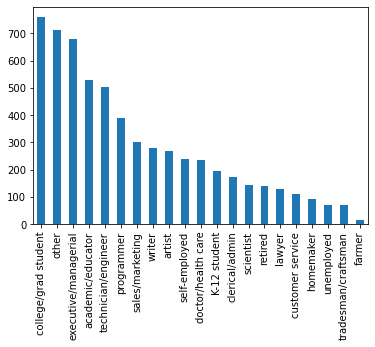

In [23]:
OccupationTitles = {
    0:  "other",
    1:  "academic/educator",
    2:  "artist",
    3:  "clerical/admin",
    4:  "college/grad student",
    5:  "customer service",
    6:  "doctor/health care",
    7:  "executive/managerial",
    8:  "farmer",
    9:  "homemaker",
    10:  "K-12 student",
    11:  "lawyer",
    12:  "programmer",
    13:  "retired",
    14:  "sales/marketing",
    15:  "scientist",
    16:  "self-employed",
    17:  "technician/engineer",
    18:  "tradesman/craftsman",
    19:  "unemployed",
    20:  "writer"
}
users_df['OccupationTitle'] = users_df['Occupation'].apply(lambda o: OccupationTitles.get(o, 'ERROR'))
users_df['OccupationTitle'].value_counts().plot(kind='bar')

## 3.4 Histogram of MeanRating

This investigation shows the distribution of the mean rating value, which is clearly skewed to the right.

array([[<AxesSubplot:title={'center':'MeanRating'}>]], dtype=object)

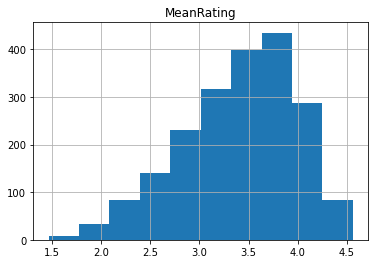

In [24]:
min_ratings_with_headings_df.hist('MeanRating')

## 3.5 Color-coded by Mean Rating

This investigation color-codes each row of the data set (grouped by MovieId) according to the movie's `MeanRating`.

The **`rating_gradient_color`** function applies a red-ish color to the row if the `MeanRating` of the movie is below the mean `MeanRating` of all movies, a yellow-ish color if the `MeanRating` is in the 75%-ile, and a green-ish color if the `MeanRating` is above the 75%-ile.

In [25]:
color_gradient = (
    (min_ratings_with_headings_df['MeanRating'].mean(), 'lightcoral'),
    (min_ratings_with_headings_df['MeanRating'].quantile(0.75), '#f2f27a'),
    (5.0, '#8dff6d')
)

def rating_gradient_color(row):
    for value, color in color_gradient:
        if row['MeanRating'] <= value:
            return ['background-color: {c}; color: black'.format(c=color)] * len(row)


min_ratings_with_headings_df.head(20).style.apply(rating_gradient_color, axis='columns')

,MeanRating,RatingCount,Title
MovieID,,,
1,4.146846,2077,Toy Story (1995)
2,3.201141,701,Jumanji (1995)
3,3.016736,478,Grumpier Old Men (1995)
4,2.729412,170,Waiting to Exhale (1995)
5,3.006757,296,Father of the Bride Part II (1995)
6,3.878723,940,Heat (1995)
7,3.410480,458,Sabrina (1995)
9,2.656863,102,Sudden Death (1995)
10,3.540541,888,GoldenEye (1995)


## References

1. Brownlee, J (2020, June).  Why one-hot encode data in machine learning?  Retrieved from https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
1. F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

1. Pandas API Reference (n.d. a)  pandas.DataFrame.info.  Retrieved from  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

1. Pandas API Reference (n.d. b)  pandas.DataFrame.shape.  Retrieved from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
